In [1]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [2]:
df_ind = df[df.job_country == 'India'].copy()

In [3]:
df_ind['job_posted_month'] = pd.to_datetime(df_ind['job_posted_date']).dt.strftime('%B')


In [4]:
df_ind_pivot = df_ind.pivot_table(
    index='job_posted_month',
    columns='job_title_short',
    aggfunc='size'
)

df_ind_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,170,32,418,1566,946,54,86,375,194,169
August,189,25,618,1407,1157,47,126,343,235,148
December,186,27,648,1464,1206,94,77,343,200,133
February,143,35,433,1631,932,42,94,313,165,157
January,175,31,628,2132,1444,70,127,448,269,192
July,142,25,457,1528,1123,54,75,359,204,155
June,146,26,367,1632,1129,41,66,427,238,125
March,116,37,422,1591,1005,34,96,351,194,180
May,103,14,278,1384,837,31,59,329,134,98


In [13]:
df_ind_pivot.reset_index(inplace=True)
df_ind_pivot['m_no'] = pd.to_datetime(df_ind_pivot.job_posted_month, format='%B').dt.month
df_ind_pivot.sort_values('m_no', inplace=True)
df_ind_pivot.set_index('job_posted_month', inplace=True)
df_ind_pivot.drop(columns='m_no')
df_ind_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,m_no
job_posted_month,,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192,1
February,143,35,433,1631,932,42,94,313,165,157,2
March,116,37,422,1591,1005,34,96,351,194,180,3
April,170,32,418,1566,946,54,86,375,194,169,4
May,103,14,278,1384,837,31,59,329,134,98,5
June,146,26,367,1632,1129,41,66,427,238,125,6
July,142,25,457,1528,1123,54,75,359,204,155,7
August,189,25,618,1407,1157,47,126,343,235,148,8
September,155,34,630,1508,984,67,85,324,195,132,9


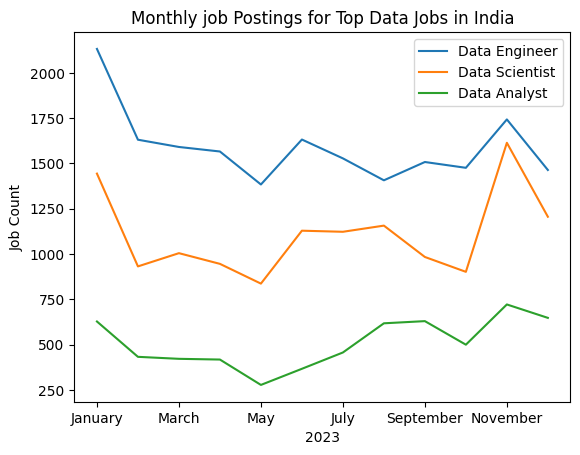

In [22]:
top_indx = df_ind.job_title_short.value_counts().head(3).index.tolist()
df_ind_pivot[top_indx].plot(kind='line')
plt.title('Monthly job Postings for Top Data Jobs in India')
plt.ylabel('Job Count')
plt.xlabel('2023')
plt.legend()
plt.show()